<a href="https://colab.research.google.com/github/Haram-hub/MLsys_100/blob/main/chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코랩 한글 폰트 설치 & mat, seaborn에 적용

In [ ]:
# 나눔고딕 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,294 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155501 files and d

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

working_dir = 'MLSys_100Knocks' #　※※ 여러분이 만든 폴더 경로가 다를 때는 다음을 변경합니다. ※※
path = f'/content/drive/MyDrive/{working_dir}/MainChapter/chapter03'
os.chdir(path)

In [ ]:
# Jupyter notebook ipywidgets 활성화
# for jupyter notebook (virtualenv 사용 시)
#!jupyter nbextension enable --user --py widgetsnbextension

# for jupyter lab
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [ ]:
! pip install ipywidgets

# 3장 시각화 구조를 구축하기 위한 테크닉 10

### 데이터 로딩





In [ ]:
import os

current_dir = os.getcwd()
current_dir

'/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03'

In [ ]:
filelist = os.listdir(current_dir)
filelist

['tbl_order_202105.csv',
 'tbl_order_202106.csv',
 'm_store.csv',
 'tbl_order_202104.csv',
 'm_area.csv',
 'chapter03_answer.ipynb',
 'chapter03.ipynb']

In [ ]:
import pandas as pd
m_area = pd.read_csv('m_area.csv')
m_store = pd.read_csv('m_store.csv')

In [ ]:
import glob 
tbl_order_form = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_list = glob.glob(tbl_order_form)
tbl_order_list

['/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202105.csv',
 '/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202106.csv',
 '/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202104.csv']

In [ ]:
order_data = pd.read_csv(tbl_order_list[2])
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2
...,...,...,...,...,...,...,...,...,...,...
233257,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2
233258,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2
233259,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9
233260,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2


In [ ]:
m_store.columns

Index(['store_id', 'store_name', 'area_cd'], dtype='object')

In [ ]:
m_area.columns

Index(['area_cd', 'wide_area', 'narrow_area'], dtype='object')

In [ ]:
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

In [ ]:
order_data.loc[order_data['takeout_flag']==0, 'takeout_name'] = 'delivery'
order_data.loc[order_data['takeout_flag']==1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status']== 0, 'status_name' ] = '주문 접수'
order_data.loc[order_data['status']== 1, 'status_name' ] = '지불 완료'
order_data.loc[order_data['status']== 2, 'status_name' ] = '배달 완료'
order_data.loc[order_data['status']== 9, 'status_name' ] = '주문 취소'

order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,지불 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233257,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2,기장대로점,BS,부산,부산,delivery,배달 완료
233258,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2,남동남로점,BS,부산,부산,delivery,배달 완료
233259,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9,첨단과기로점,GJ,광주,광주,delivery,주문 취소
233260,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2,계룡로점,DJ,대전,대전,delivery,배달 완료


### 테크닉 21: 매장을 필터링해서 시각화하자

In [ ]:
store_list = m_store['store_name'].tolist()
store_list

['삼일대로점',
 '세종대로점',
 '무교로점',
 '덕수궁길점',
 '서소문로점',
 '청계청로점',
 '노해로점',
 '당산로점',
 '남부순환로점',
 '성내로점',
 '자양로점',
 '봉화산로점',
 '창경궁로점',
 '월드컵로점',
 '학동로점',
 '삼봉로점',
 '관악로점',
 '가마산로점',
 '목공동로점',
 '장승배기로점',
 '고산자로점',
 '녹사평대로점',
 '시흥대로점',
 '연희로점',
 '도봉로점',
 '화곡로점',
 '천호대로점',
 '올림픽로점',
 '은평로점',
 '마들로점',
 '보문로점',
 '안양천로점',
 '서초중앙로점',
 '성산동점',
 '국제금융로점',
 '강남대로점',
 '법원로점',
 '종로점',
 '사직로점',
 '마포대로점',
 '월계로점',
 '삼일대로2점',
 '세종대로2점',
 '무교로2점',
 '덕수궁길2점',
 '서소문로2점',
 '청계청로2점',
 '노해로2점',
 '당산로2점',
 '남부순환로2점',
 '성내로2점',
 '자양로2점',
 '봉화산로2점',
 '창경궁로2점',
 '월드컵로2점',
 '학동로2점',
 '삼봉로2점',
 '관악로2점',
 '가마산로2점',
 '목공동로2점',
 '장승배기로2점',
 '고산자로2점',
 '녹사평대로2점',
 '시흥대로2점',
 '연희로2점',
 '도봉로2점',
 '화곡로2점',
 '천호대로2점',
 '올림픽로2점',
 '은평로2점',
 '마들로2점',
 '보문로2점',
 '안양천로2점',
 '서초중앙로2점',
 '성산동2점',
 '국제금융로2점',
 '강남대로2점',
 '법원로2점',
 '종로2점',
 '사직로2점',
 '마포대로2점',
 '월계로2점',
 '서초중앙로3점',
 '강남점3점',
 '양재점',
 '양재2점',
 '중앙대로점',
 '낙동대로점',
 '낙동대로2점',
 '학감대로점',
 '중구로점',
 '태종로점',
 '구청로점',
 '남천동로점',
 '중앙대로2점',
 '구덕로점',
 '연제로점',
 '낙동북로점',
 '못골로점',
 '온천

In [24]:
from ipywidgets import Dropdown

def order_by_store(val):
  clear_output()
  display(dropdown)
  pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]

dropdown = Dropdown(options=store_list, description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)


Dropdown(description='지역 선택:', index=4, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', …

In [25]:
from ipywidgets import Dropdown
from IPython.display import clear_output

def order_by_store(val):
  clear_output(wait=False)
  display(dropdown)
  pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
  display(pick_data.head())

dropdown = Dropdown(options=store_list, description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', index=12, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점',…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
91,55979026,13,C38527298,10,37242082,2021-04-01 11:05,2021-04-01 11:23,0,51000,2,창경궁로점,SL,서울,서울,delivery,배달 완료
532,51387632,13,C37853748,39,17202998,2021-04-01 11:41,2021-04-01 12:16,0,23630,2,창경궁로점,SL,서울,서울,delivery,배달 완료
603,78078447,13,C29683479,18,60240926,2021-04-01 11:47,2021-04-01 12:25,0,38650,2,창경궁로점,SL,서울,서울,delivery,배달 완료
825,97960937,13,C78762348,65,80224151,2021-04-01 12:07,2021-04-01 12:21,0,23080,2,창경궁로점,SL,서울,서울,delivery,배달 완료
924,74878830,13,C63934459,55,86663241,2021-04-01 12:15,2021-04-01 12:44,1,20640,1,창경궁로점,SL,서울,서울,takeout,지불 완료


Dropdown(index=8, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내로…

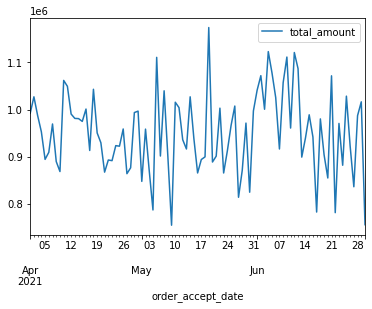

In [30]:
% matplotlib inline

def graph_by_store(val):
  clear_output()
  display(dropdown2)
  pick_data = order_data.loc[(order_data['store_name']==val['new'])&(order_data['status'].isin([1,2]))]

  temp = pick_data[['order_accept_date','total_amount']].copy()
  temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
  temp.set_index('order_accept_date', inplace=True)
  temp.resample('D').sum().plot()

dropdown2 = Dropdown(options = store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

In [27]:
# datetime 변환, 인덱스 전환 실험
temp = order_data[['order_accept_date','total_amount']].copy()
temp['order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
temp.set_index('order_accept_date', inplace=True)
temp

,total_amount
order_accept_date,
2021-04-01 11:00:00,28270
2021-04-01 11:00:00,28270
2021-04-01 11:00:00,26470
2021-04-01 11:00:00,23080
2021-04-01 11:00:00,46920
...,...
2021-04-30 21:58:00,35300
2021-04-30 21:58:00,32340
2021-04-30 21:58:00,36170


In [ ]:
order_data.columns

Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

### 테크닉 22: 여러 매장의 상세 정보를 시각화하자

In [28]:
from ipywidgets import SelectMultiple

# val을 너무 깊게 고민하지말고, 그냥 문법으로 외우자. 
# val['new']는 위젯에서 새롭게 감지된 새로운 값!
def order_by_multi(val):
  clear_output()
  display(select)
  
  # SelectMultiple로 선택된 val['new'] 값은 list로 표현되는 듯함. 
  # 조건은 == 이 아닌 isin으로
  pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))&(order_data['status'].isin([1,2]))]
  display(pick_data.head())

select = SelectMultiple(options = store_list)
select.observe(order_by_multi, names='value')
display(select)


SelectMultiple(index=(0, 1), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
49,12812014,1,C81203759,46,85076518,2021-04-01 11:03,2021-04-01 11:23,1,30500,1,삼일대로점,SL,서울,서울,takeout,지불 완료
69,75821507,2,C39916077,89,20828249,2021-04-01 11:04,2021-04-01 11:43,1,26030,1,세종대로점,SL,서울,서울,takeout,지불 완료
286,12439341,2,C41983039,58,89485581,2021-04-01 11:22,2021-04-01 11:33,0,32340,2,세종대로점,SL,서울,서울,delivery,배달 완료
439,82305620,1,C93103282,74,51492324,2021-04-01 11:32,2021-04-01 11:56,1,26150,1,삼일대로점,SL,서울,서울,takeout,지불 완료
583,39372433,2,C80973903,26,5757478,2021-04-01 11:46,2021-04-01 12:22,0,23880,2,세종대로점,SL,서울,서울,delivery,배달 완료


In [31]:
fig = plt.figure(figsize=(17,4))
plt.subplots_adjust(wspace=0.25, hspace=0.6)

<Figure size 1224x288 with 0 Axes>

In [40]:
import warnings 
warnings.filterwarnings('ignore')

SelectMultiple(description='매장 선택: ', index=(8, 11), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청…

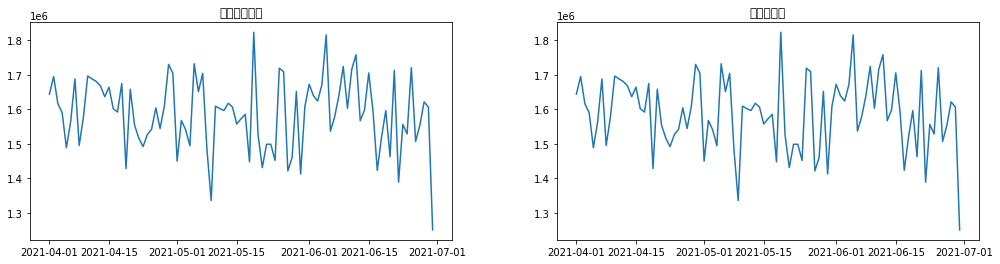

In [45]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

def graph_by_multi(val):
  clear_output()
  display(select2)

  fig = plt.figure(figsize=(17,4))
  #그래프간 간격조정
  plt.subplots_adjust(wspace=0.25, hspace=0.6)

  i = 0

  for trg in val['new']:
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))&(order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date','total_amount']]
    temp['order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace = True)
    i+=1 #matplot에서 axis는 1부터 시작 
    ax = fig.add_subplot(1, len(val['new']), i)# 행 수, 열 수, 인덱스
    ax.plot(temp.resample('D').sum())
    ax.set_title(trg)

select2 = SelectMultiple(options=store_list, description = '매장 선택: ')
select2.observe(graph_by_multi, names='value')
display(select2)

### 테크닉 23: 슬라이드바를 이용해 주문 건수를 조사하자

In [48]:

from ipywidgets import IntSlider

def store_lower(val):
  clear_output()
  display(slider)
  temp = order_data.groupby('store_name') #groupby 후에 .size()하면 개수 세줌.
  print(temp.size()[temp.size() < val['new'] ]) #지금 order_data에 int형식이 total_amount밖에 없어서 가능.

slider = IntSlider(value = 1100, min=1000, max=2000, step=100, description = '건수:')
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1200, description='건수:', max=2000, min=1000, step=100)

Series([], dtype: int64)


### 테크닉 24: 토글 버튼을 이용해 지역 데이터를 추출하자

### 테크닉 25: 날짜를 지정해 데이터를 추출하자

### 테크닉 26: 스토리를 생각해서 데이터를 구축하자

데이터로딩

In [50]:
# 데이터 로딩

import glob

current_dir = os.getcwd()
filelist = os.listdir(current_dir)
filelist

['tbl_order_202105.csv',
 'tbl_order_202106.csv',
 'm_store.csv',
 'tbl_order_202104.csv',
 'm_area.csv',
 'chapter03_answer.ipynb',
 'chapter03.ipynb']

In [52]:
key = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_ = glob.glob(key)
tbl_order_

['/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202105.csv',
 '/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202106.csv',
 '/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202104.csv']

In [55]:
order_all = pd.DataFrame()

for file in tbl_order_:
  temp = pd.read_csv(file)
  print(f'{file}:{len(temp)}')
  order_all = pd.concat([order_all, temp], ignore_index = True)
  
order_all



/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202105.csv:241142
/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202106.csv:233302
/content/drive/MyDrive/MLSys_100Knocks/MainChapter/chapter03/tbl_order_202104.csv:233262


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9
...,...,...,...,...,...,...,...,...,...,...
707701,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2
707702,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2
707703,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9
707704,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2


In [59]:

# 불필요한 데이터 제거
order_data = order_all.loc[order_all['store_id']!=999]

# 마스터 데이터 결합
order_data = pd.merge(order_data,m_store,on='store_id',how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# 이름 설정(수령 방법)
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

# 이름 설정(수령 상태)
order_data.loc[order_data['status']== 0, 'status_name' ] = '주문 접수'
order_data.loc[order_data['status']== 1, 'status_name' ] = '지불 완료'
order_data.loc[order_data['status']== 2, 'status_name' ] = '배달 완료'
order_data.loc[order_data['status']== 9, 'status_name' ] = '주문 취소'

order_data['order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date #dt.date: yyyy-mm-dd

order_data


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2,삼봉로점,SL,서울,서울,delivery,배달 완료,2021-05-01
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2,광산로점,GJ,광주,광주,delivery,배달 완료,2021-05-01
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2,연제로점,BS,부산,부산,delivery,배달 완료,2021-05-01
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2,중앙대로2점,BS,부산,부산,delivery,배달 완료,2021-05-01
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9,당산로2점,SL,서울,서울,delivery,주문 취소,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703881,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2,기장대로점,BS,부산,부산,delivery,배달 완료,2021-04-30
703882,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2,남동남로점,BS,부산,부산,delivery,배달 완료,2021-04-30
703883,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9,첨단과기로점,GJ,광주,광주,delivery,주문 취소,2021-04-30
703884,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2,계룡로점,DJ,대전,대전,delivery,배달 완료,2021-04-30


In [61]:
order_data.groupby(['store_id', 'customer_id'])["total_amount"].describe()

count          mean           std      min      25%  \
store_id customer_id                                                        
1        C00244531     14.0  33195.714286   8602.625462  18820.0  25157.5   
         C00493736      7.0  33181.428571   9225.469145  24710.0  27190.0   
         C01249550      9.0  28896.666667  10423.662984  18570.0  20640.0   
         C02241044      6.0  36538.333333  11844.077704  22520.0  25710.0   
         C02859946      9.0  32165.555556   8582.160438  18570.0  26470.0   
...                     ...           ...           ...      ...      ...   
196      C84471901     65.0  27887.538462   8096.654987   6980.0  22380.0   
         C88251581     57.0  30461.228070   9909.696923   6980.0  23280.0   
         C90878439     76.0  28634.605263   8527.747564   6980.0  21540.0   
         C97487773     62.0  30135.806452   9026.498431   6980.0  22380.0   
         C98683987     72.0  28679.861111   9114.931952   6980.0  21540.0   

                          50%      75%      max  
store_id customer_id                             
1        C00244531    36795.0  39010.0  44620.0  
         C00493736    29870.0  36155.0  51000.0  
         C01249550    26470.0  39000.0  46920.0  
         C02241044    39795.0  46837.5  46920.0  
         C02859946    35860.0  39000.0  39310.0  
...                       ...      ...      ...  
196      C84471901    26770.0  32340.0  46590.0  
         C88251581    29870.0  39000.0  46590.0  
         C90878439    26150.0  38650.0  46590.0  
         C97487773    27790.0  39000.0  46590.0  
         C98683987    26770.0  35300.0  46590.0  

[41336 rows x 8 columns]

In [63]:
order_data.dtypes

order_id              int64
store_id              int64
customer_id          object
coupon_cd             int64
sales_detail_id       int64
order_accept_date    object
delivered_date       object
takeout_flag          int64
total_amount          int64
status                int64
store_name           object
area_cd              object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
order_date           object
dtype: object

In [71]:
# 결제완료, 배달완료의 합계를 계산해 매출상위 및 하위 매장 표시
summary_df = order_data.loc[order_data['status'].isin([1,2])]
summary_df_store = summary_df.groupby(['store_id'])['total_amount'].sum() #groupby도 column 이름으로 인덱싱 가능
summary_df_store = pd.merge(summary_df_store, m_store, how = 'left', on= 'store_id')
print("매출 상위")
display(summary_df_store.sort_values('total_amount', ascending = False).head(10))
print("매출 하위")
display(summary_df_store.sort_values('total_amount', ascending = True).head(10))

매출 상위


,store_id,total_amount,store_name,area_cd
47,48,120384690,노해로2점,SL
190,191,118095960,사우중로점,GB
122,123,113134310,송정해변로점,BS
67,68,112799400,천호대로2점,SL
62,63,112211910,녹사평대로2점,SL
126,127,111797560,분포로점,BS
99,100,111248660,온천천로점,BS
43,44,110643570,무교로2점,SL
78,79,110076670,종로2점,SL
172,173,110034720,비아로점,GJ


매출 하위


,store_id,total_amount,store_name,area_cd
100,101,53586580,중동2로점,BS
2,3,56984250,무교로점,SL
75,76,57112800,국제금융로2점,SL
151,152,57119100,대흥로점,DJ
11,12,57884940,봉화산로점,SL
195,196,58966680,석봉로점,GB
185,186,60675020,효원로점,GN
161,162,61621230,상무번영로점,GJ
69,70,62304610,은평로2점,SL
145,146,62967010,용운동점,DJ


In [75]:
set(order_data['status_name'])

{'배달 완료', '주문 취소', '지불 완료'}

In [84]:
cancel_df=pd.DataFrame()
cancel_cnt = order_data.loc[order_data['status_name']=='주문 취소'].groupby('store_id')['store_id'].count()
order_cnt = order_data.loc[order_data['status_name'].isin(['배달 완료', '주문 취소', '지불 완료'])].groupby('store_id')['store_id'].count()
cancel_rate = cancel_cnt/order_cnt*100
cancel_df["cancel_rate"]=cancel_rate
cancel_df

,cancel_rate
store_id,
1,18.969885
2,18.636756
3,18.555901
4,18.160767
5,18.172100
...,...
192,18.301793
193,18.838604
194,18.023084


In [85]:
cancel_df=pd.merge(cancel_df, m_store, how='left', on='store_id')
cancel_df=pd.merge(cancel_df, m_area, how='left', on='area_cd')
print('취소 상위')
display(cancel_df.sort_values('cancel_rate', ascending = False).head(10))

print('취소 하위')
display(cancel_df.sort_values('cancel_rate', ascending = True).head(10))

취소 상위


,store_id,cancel_rate,store_name,area_cd,wide_area,narrow_area
7,8,20.218409,당산로점,SL,서울,서울
138,139,20.086795,한밭대로점,DJ,대전,대전
131,132,19.948335,대전로점,DJ,대전,대전
156,157,19.811321,우치로점,GJ,광주,광주
95,96,19.747546,구덕로점,BS,부산,부산
9,10,19.592697,성내로점,SL,서울,서울
65,66,19.592697,도봉로2점,SL,서울,서울
194,195,19.568966,화중로점,GB,경기,경기북부
75,76,19.525302,국제금융로2점,SL,서울,서울
176,177,19.483501,필문대로점,GJ,광주,광주


취소 하위


,store_id,cancel_rate,store_name,area_cd,wide_area,narrow_area
121,122,16.590164,해운대해변로점,BS,부산,부산
119,120,16.595404,청사포로점,BS,부산,부산
130,131,16.626287,둔산로점,DJ,대전,대전
40,41,17.073840,월계로점,SL,서울,서울
152,153,17.110834,내방로점,GJ,광주,광주
33,34,17.150396,성산동점,SL,서울,서울
146,147,17.290026,한남로점,DJ,대전,대전
19,20,17.304297,장승배기로점,SL,서울,서울
68,69,17.320341,올림픽로2점,SL,서울,서울
122,123,17.361261,송정해변로점,BS,부산,부산


In [104]:
#취소율 상위10개, 하위10개 매장코드 저장
cancelrate_u10 = list(cancel_df.sort_values('cancel_rate', ascending = False)[:10]['store_id'])
cancelrate_d10 = list(cancel_df.sort_values('cancel_rate', ascending = True)[:10]['store_id'])
cancelrate_ud20 = cancelrate_u10 + cancelrate_d10
len(cancelrate_ud20)

20

### 테크닉 27: 주문 취소 이유를 분석하자

In [89]:
order_data['status_name']

0         배달 완료
1         배달 완료
2         배달 완료
3         배달 완료
4         주문 취소
          ...  
703881    배달 완료
703882    배달 완료
703883    주문 취소
703884    배달 완료
703885    지불 완료
Name: status_name, Length: 703886, dtype: object

In [119]:
delivery_df = order_data.loc[(order_data['status_name']=='배달 완료') & 
                             (order_data['store_id'].isin(cancelrate_u10))] #배달 완료 데이터만 사용

# 날짜 형식 변환
delivery_df['order_accept_date'] = pd.to_datetime(delivery_df['order_accept_date'])
delivery_df['delivered_date'] = pd.to_datetime(delivery_df['delivered_date'])

# 시간 계산 함수
def calc_delta(t):
  t1, t2 = t
  d = t2 - t1
  return d.total_seconds() /60 #시간의 총 초수 계산

delivery_df['time_delta(min)']=delivery_df[['order_accept_date',
                                       'delivered_date']].apply(calc_delta, axis=1)

#display(delivery_df)                                       
print("주문 취소율 상위 10개 매장")                                       
                                       
pd.DataFrame(delivery_df.groupby('store_id').mean()['time_delta(min)'])
                                      

주문 취소율 상위 10개 매장


,time_delta(min)
store_id,
8,47.560231
10,47.264932
66,47.909249
76,47.688018
96,47.666209
132,47.943930
139,48.212598
157,47.913215
177,34.585742


In [118]:
delivery_df = order_data.loc[(order_data['status_name']=='배달 완료') & 
                             (order_data['store_id'].isin(cancelrate_d10))] #배달 완료 데이터만 사용

# 날짜 형식 변환
delivery_df['order_accept_date'] = pd.to_datetime(delivery_df['order_accept_date'])
delivery_df['delivered_date'] = pd.to_datetime(delivery_df['delivered_date'])

# 시간 계산 함수
def calc_delta(t):
  t1, t2 = t
  d = t2 - t1
  return d.total_seconds() /60 #시간의 총 초수 계산

delivery_df['time_delta(min)']=delivery_df[['order_accept_date',
                                       'delivered_date']].apply(calc_delta, axis=1)

#display(delivery_df)                                       

print("주문 취소율 하위 10개 매장")                                   
                                       
pd.DataFrame(delivery_df.groupby('store_id').mean()['time_delta(min)'])
                                      

주문 취소율 하위 10개 매장


,time_delta(min)
store_id,
20,20.413678
34,20.201694
41,20.282918
69,20.217254
120,20.034483
122,20.164304
123,20.236935
131,20.048651
147,34.004739


### 테크닉 28: 가설을 검증하자

### 테크닉 29: 스토리를 기반으로 부속과 데이터를 조합해 대시보드를 만들자

### 테크닉 30: 대시보드를 개선하자